In [249]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math
import random
import sys
import pickle
from sklearn import datasets

In [251]:
# Read data
df1 = pd.read_csv("/content/drive/MyDrive/IS675_data/ecommerce.csv")
df1

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
0,AU-2015-1,11/9/15,11/17/15,8.0,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,6/30/15,7/2/15,2.0,First Class,Auto & Accessories,Car Speakers,$211.00,3,0.03,...,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,12/5/15,12/13/15,8.0,First Class,Auto & Accessories,Car Body Covers,$117.00,5,0.01,...,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,5/9/15,5/16/15,7.0,First Class,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,...,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,7/9/15,7/18/15,9.0,First Class,Auto & Accessories,Tyre,$250.00,1,0.04,...,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,FA-2015-30771,1/21/15,1/27/15,6.0,Standard Class,Fashion,Sports Wear,$85.00,5,0.04,...,$1.70,Medium,IN-0040977,Welch Fein,Corporate,Pasadena,Texas,United States,Central,Jan
51286,FA-2015-30772,6/22/15,6/24/15,2.0,Standard Class,Fashion,Sports Wear,$85.00,1,0.03,...,$0.20,Medium,TT-0040978,Martinez Arnett,Corporate,Harare,Harare,Zimbabwe,Africa,Jun
51287,FA-2015-30773,1/1/15,1/7/15,6.0,Standard Class,Fashion,Sports Wear,$85.00,1,0.05,...,$0.10,Medium,ON-0040979,Mccoy Duston,Home Office,Townsville,Queensland,Australia,Oceania,Jan
51288,FA-2015-30774,12/7/15,12/14/15,7.0,Standard Class,Fashion,Sports Wear,$85.00,3,0.04,...,$2.80,Medium,RN-0040980,Bentley Zypern,Consumer,Houston,Texas,United States,Central,Dec


In [252]:
df1.head()

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
0,AU-2015-1,11/9/15,11/17/15,8.0,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,6/30/15,7/2/15,2.0,First Class,Auto & Accessories,Car Speakers,$211.00,3,0.03,...,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,12/5/15,12/13/15,8.0,First Class,Auto & Accessories,Car Body Covers,$117.00,5,0.01,...,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,5/9/15,5/16/15,7.0,First Class,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,...,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,7/9/15,7/18/15,9.0,First Class,Auto & Accessories,Tyre,$250.00,1,0.04,...,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


In [253]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          51290 non-null  object 
 1   Order Date        51289 non-null  object 
 2   Ship Date         51290 non-null  object 
 3   Aging             51289 non-null  float64
 4   Ship Mode         51290 non-null  object 
 5   Product Category  51290 non-null  object 
 6   Product           51290 non-null  object 
 7   Sales             51290 non-null  object 
 8   Quantity          51289 non-null  object 
 9   Discount          51290 non-null  object 
 10  Profit            51290 non-null  object 
 11  Shipping Cost     51290 non-null  object 
 12  Order Priority    51288 non-null  object 
 13  Customer ID       51289 non-null  object 
 14  Customer Name     51290 non-null  object 
 15  Segment           51289 non-null  object 
 16  City              51290 non-null  object

In [254]:
df1.shape

(51290, 21)

In [255]:
df1.dtypes

,0
Order ID,object
Order Date,object
Ship Date,object
Aging,float64
Ship Mode,object
Product Category,object
Product,object
Sales,object
Quantity,object
Discount,object


In [256]:
# Remove the dollar sign from the 'Sales' column for easier numeric conversion
df1['Sales'] = df1['Sales'].str.replace('$',"")

In [257]:
# Remove rows where the 'Sales' column contains the invalid string "0.xf"
df1=df1[df1.Sales != ("0.xf")]

In [258]:
# Remove rows where the 'Sales' column contains the invalid string "0.5.26"
df1=df1[df1.Sales != ('0.5.26') ]

In [259]:
# Convert the cleaned 'Sales' column to float for numeric operations
df1['Sales'] = df1['Sales'].astype(float)

In [260]:
# Remove rows where the 'Discount' column contains the invalid string "xxx"
df1=df1[df1.Discount != ('xxx') ]

In [261]:
# Remove rows where the 'Discount' column contains the invalid string "test"
df1=df1[df1.Discount != ('test') ]

In [262]:
# Convert the cleaned 'Discount' column to float for numeric operations
df1['Discount'] = df1['Discount'].astype(float)

In [263]:
# Remove the dollar sign from the 'Shipping Cost' column for easier numeric conversion
df1['Shipping Cost'] = df1['Shipping Cost'].str.replace('$',"")

In [264]:
# Remove rows where the 'Shipping Cost' column contains the invalid string "test"
df1=df1[df1 ['Shipping Cost']!= ('test') ]

In [265]:
# Convert the cleaned 'Shipping Cost' column to float for numeric operations
df1['Shipping Cost'] = df1['Shipping Cost'].astype(float)

In [266]:
# Remove the dollar sign from the 'Profit' column for easier numeric conversion
df1['Profit'] = df1['Profit'].str.replace('$',"")

In [267]:
# Convert the cleaned 'Profit' column to float for numeric operations
df1['Profit'] = df1['Profit'].astype(float)

In [268]:
# Remove rows where the 'Quantity' column contains the invalid string "abc"
df1=df1[df1.Quantity != ("abc")]

In [269]:
# Convert the cleaned 'Quantity' column to float for numeric operations
df1['Quantity'] = df1['Quantity'].astype(float)

In [270]:
# Convert the 'Order Date' column to datetime format for date-related operations
df1['Order Date'] = pd.to_datetime(df1['Order Date'])

In [271]:
# Convert the 'Ship Date' column to datetime format for date-related operations
df1['Ship Date'] = pd.to_datetime(df1['Ship Date'])

In [272]:
df1.dtypes

,0
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Aging,float64
Ship Mode,object
Product Category,object
Product,object
Sales,float64
Quantity,float64
Discount,float64


In [273]:
df1.isnull().sum()

,0
Order ID,0
Order Date,1
Ship Date,0
Aging,1
Ship Mode,0
Product Category,0
Product,0
Sales,0
Quantity,1
Discount,0


In [274]:
 df1['Aging'] = df1['Aging'].fillna(df1.Aging.mean()) # fill the null with the mean

In [275]:
df1['Quantity'] = df1['Quantity'].fillna(df1.Quantity.mean())#fill the null with the mean

In [276]:
df1 = df1.dropna()

In [277]:
df1.shape

(51280, 21)

In [278]:
df1.isnull()

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51286,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51287,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51288,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [279]:
print(df1.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
51285    False
51286    False
51287    False
51288    False
51289    False
Length: 51280, dtype: bool


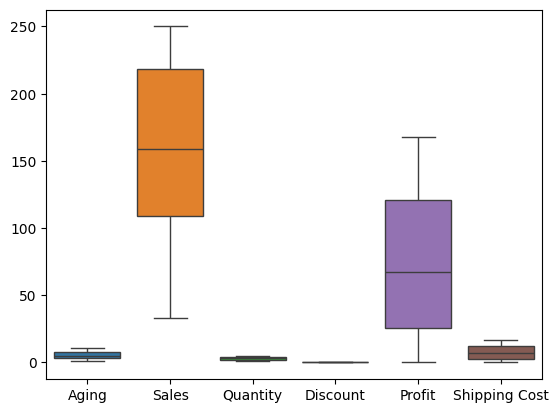

In [280]:
sns.boxplot(data=df1);

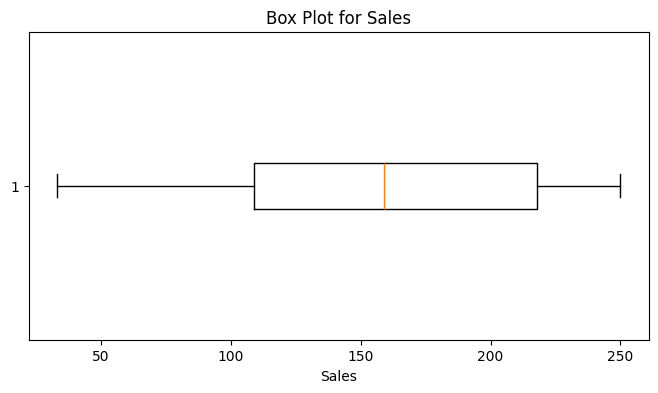

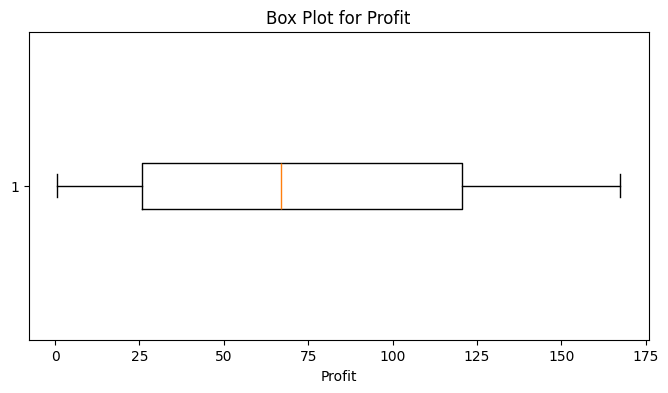

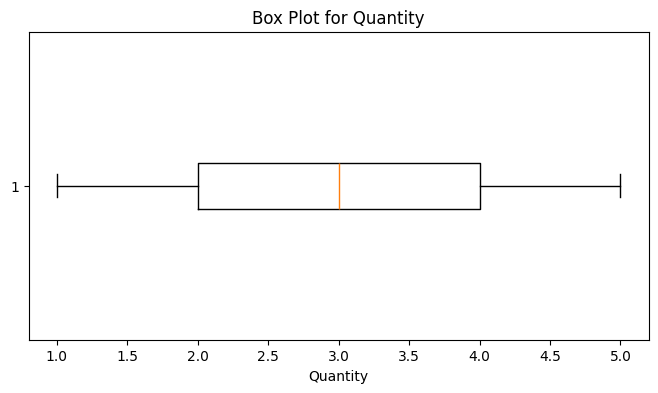

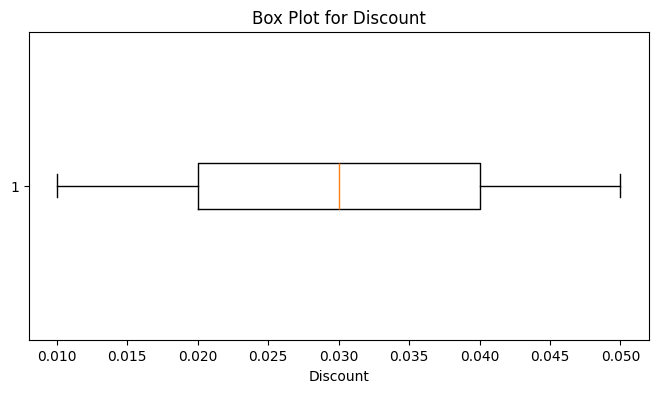

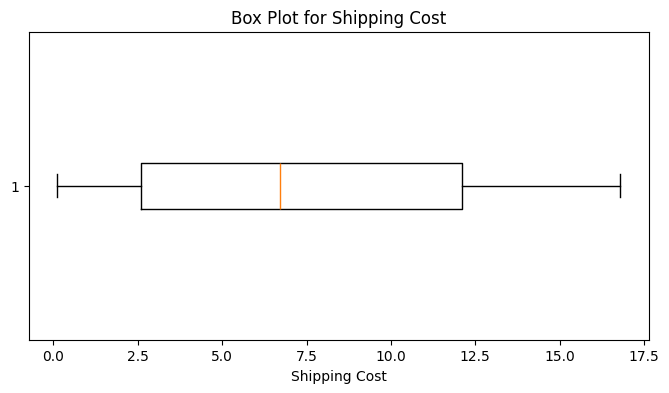

In [281]:
import matplotlib.pyplot as plt

# Plot box plots for numeric columns
numeric_columns = ['Sales', 'Profit', 'Quantity', 'Discount', 'Shipping Cost']
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df1[col].dropna(), vert=False)
    plt.title(f'Box Plot for {col}')
    plt.xlabel(col)
    plt.show()


In [282]:
# Detect outliers using IQR
outlier_info = {}

for col in numeric_columns:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]
    outlier_info[col] = {'Lower Bound': lower_bound, 'Upper Bound': upper_bound, 'Outliers Count': len(outliers)}

# Print outlier information for each column in separate lines
for col, info in outlier_info.items():
    print(f"Column: {col}")
    print(f"  Lower Bound: {info['Lower Bound']}")
    print(f"  Upper Bound: {info['Upper Bound']}")
    print(f"  Outliers Count: {info['Outliers Count']}")
    print()  # Empty line for better readability


Column: Sales
  Lower Bound: -54.5
  Upper Bound: 381.5
  Outliers Count: 0

Column: Profit
  Lower Bound: -116.64999999999999
  Upper Bound: 262.95
  Outliers Count: 0

Column: Quantity
  Lower Bound: -1.0
  Upper Bound: 7.0
  Outliers Count: 0

Column: Discount
  Lower Bound: -0.009999999999999998
  Upper Bound: 0.07
  Outliers Count: 0

Column: Shipping Cost
  Lower Bound: -11.65
  Upper Bound: 26.35
  Outliers Count: 0



In [283]:
 df1['Ship Mode'].value_counts()

,count
Ship Mode,
Standard Class,30775
Second Class,10309
First Class,7494
Same Day,2701
45788,1


In [284]:
df1=df1[df1 ['Ship Mode']!= ('45788') ]

In [285]:
df1.describe().round(2)

,Order Date,Ship Date,Aging,Sales,Quantity,Discount,Profit,Shipping Cost
count,51279,51279,51279.00,51279.00,51279.00,51279.00,51279.00,51279.00
mean,2015-07-02 08:39:39.079155200,2015-07-07 13:31:21.822968320,5.26,156.43,3.00,0.03,72.72,7.27
min,2015-01-01 00:00:00,2015-01-01 00:00:00,1.00,33.00,1.00,0.01,0.50,0.10
25%,2015-04-02 00:00:00,2015-04-07 00:00:00,3.00,109.00,2.00,0.02,25.70,2.60
50%,2015-07-03 00:00:00,2015-07-08 00:00:00,5.00,159.00,3.00,0.03,67.00,6.70
75%,2015-10-02 00:00:00,2015-10-07 00:00:00,8.00,218.00,4.00,0.04,120.60,12.10
max,2015-12-31 00:00:00,2016-01-10 00:00:00,10.50,250.00,5.00,0.05,167.50,16.80
std,NaN,NaN,2.96,65.78,1.41,0.01,49.10,4.91


In [286]:
df1_subset = df1.loc[:, ["Aging","Sales","Profit","Quantity","Shipping Cost"]]

In [287]:
df1_subset_corr = pd.DataFrame(np.corrcoef(df1_subset.T))
df1_subset_corr.columns = ["Aging","Sales","Profit","Quantity","Shipping Cost"]

df1_subset_corr.index = ["Aging","Sales","Profit","Quantity","Shipping Cost"]
df1_subset_corr


,Aging,Sales,Profit,Quantity,Shipping Cost
Aging,1.000000,0.014862,0.015293,-0.002497,0.015207
Sales,0.014862,1.000000,0.921518,-0.000609,0.921268
Profit,0.015293,0.921518,1.000000,-0.176323,0.999982
Quantity,-0.002497,-0.000609,-0.176323,1.000000,-0.176657
Shipping Cost,0.015207,0.921268,0.999982,-0.176657,1.000000


<Figure size 5000x1000 with 0 Axes>

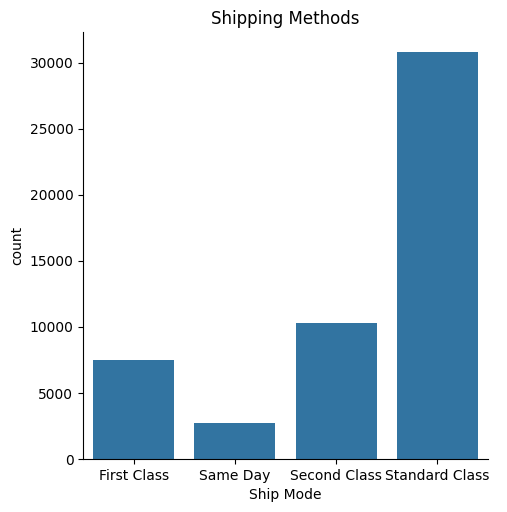

<Figure size 5000x1000 with 0 Axes>

In [288]:
#We note that the most used method is standard shipping
sns.catplot(x='Ship Mode',kind='count', data=df1 )
plt.title('Shipping Methods')
plt.figure(figsize=(50,10))

Text(0, 0.5, 'count')

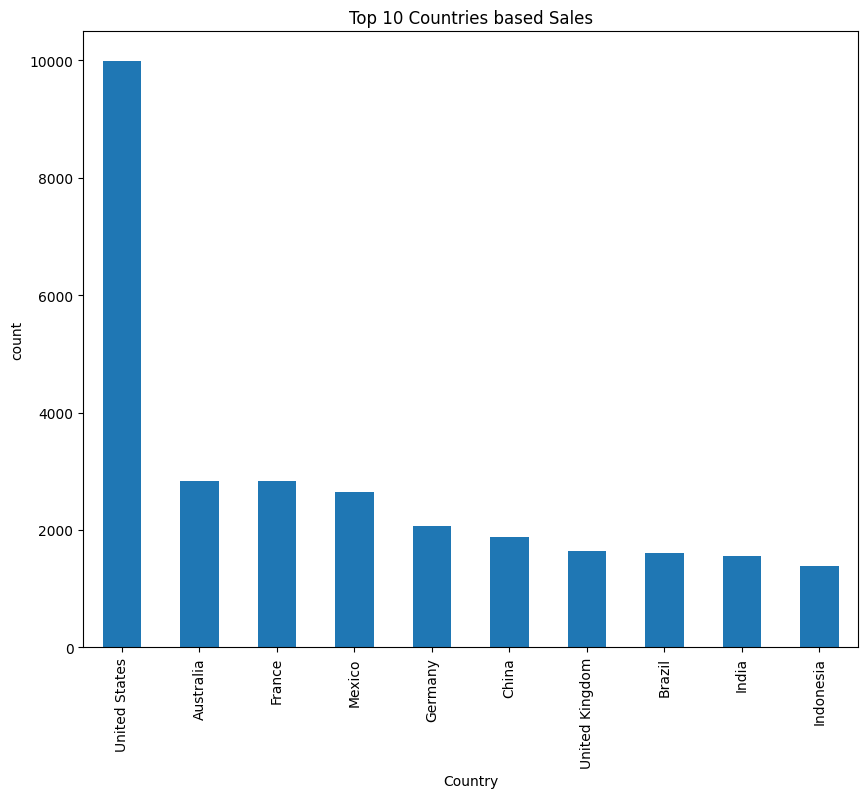

In [289]:
#United States got most of online shoppers followed by Australia and France

top_10 = df1['Country'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(10,8))
plt.title('Top 10 Countries based Sales')
plt.xlabel("Country")
plt.ylabel("count")

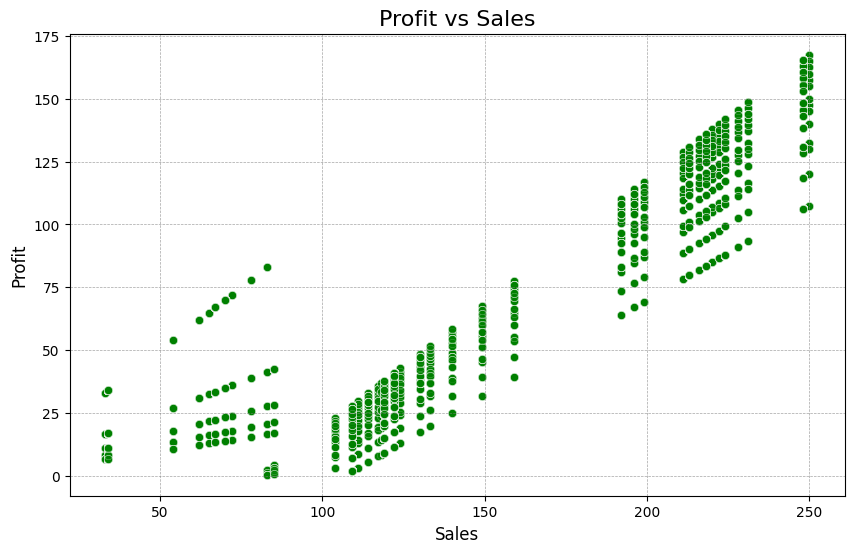

In [290]:
# Scatter Plot: Profit vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df1, alpha=0.7, color='green')
plt.title('Profit vs Sales', fontsize=16)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


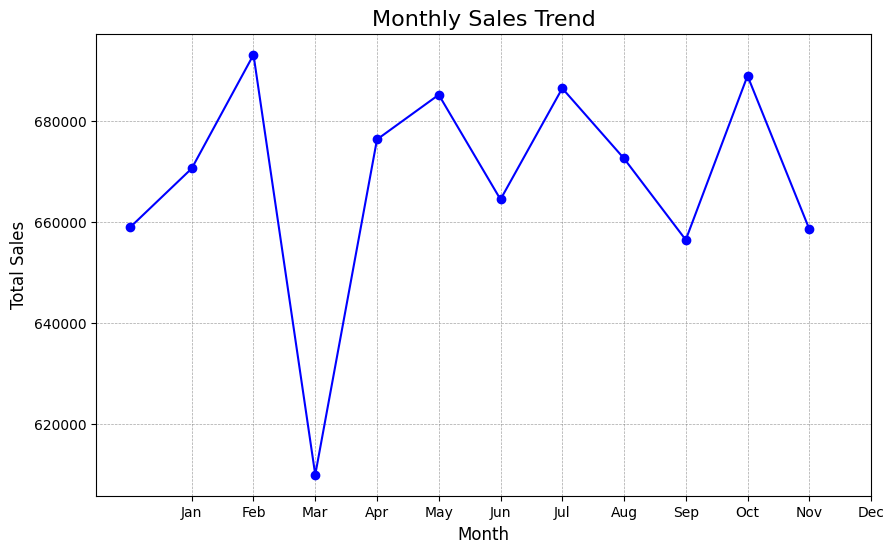

In [291]:
# Monthly Sales Trend
monthly_sales = df1.groupby('Months')['Sales'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


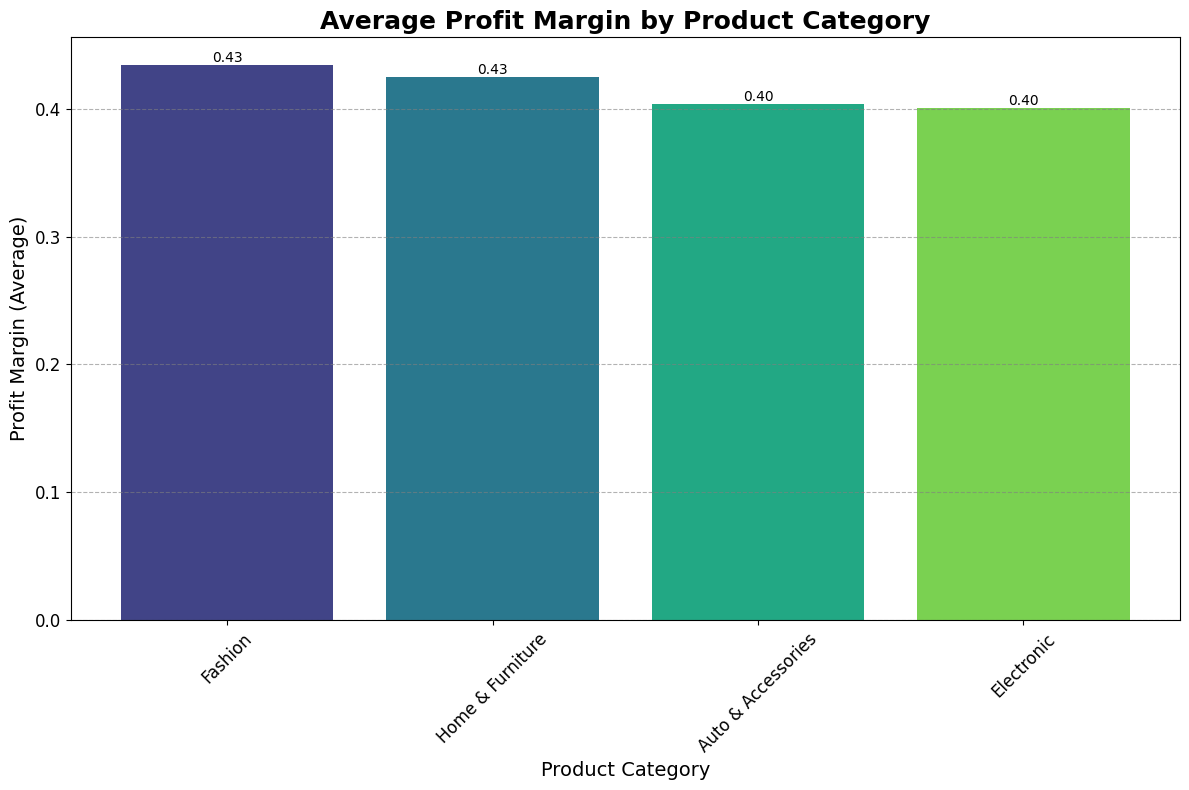

In [292]:
# Calculate Profit Margin by Product Category
df1['Profit Margin'] = df1['Profit'] / df1['Sales']
profit_margin = df1.groupby('Product Category')['Profit Margin'].mean().sort_values(ascending=False)

# Plotting Average Profit Margin by Product Category
plt.figure(figsize=(12, 8))
bars = plt.bar(profit_margin.index, profit_margin, color=sns.color_palette("viridis", len(profit_margin)))

# Add data labels to each bar
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Position at the center of the bar
        bar.get_height(),                  # Height of the bar
        f'{bar.get_height():.2f}',         # Label (formatted as float with 2 decimals)
        ha='center', va='bottom',         # Horizontal and vertical alignment
        fontsize=10, color='black'
    )

# Graph Formatting
plt.title('Average Profit Margin by Product Category', fontsize=18, fontweight='bold')
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Profit Margin (Average)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.6)
plt.tight_layout()

# Display the graph
plt.show()


Target Variable Distribution (Percentage):
Product Category
Fashion               0.600148
Home & Furniture      0.201037
Auto & Accessories    0.146142
Electronic            0.052673
Name: proportion, dtype: float64


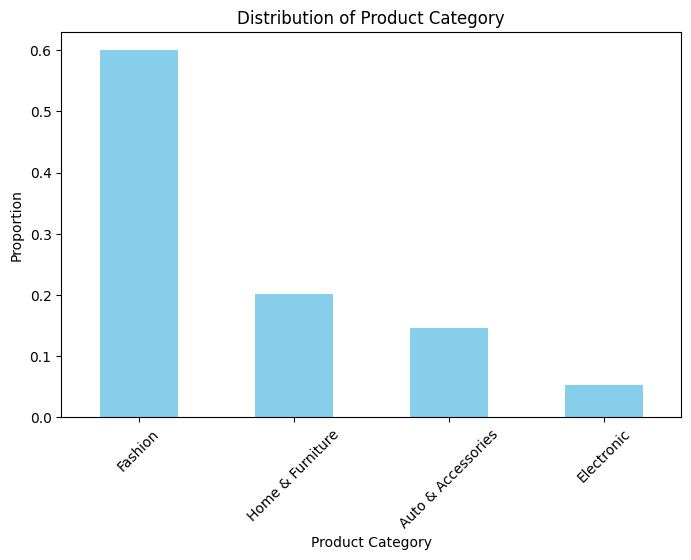

In [293]:
import matplotlib.pyplot as plt

# Check the distribution of the target variable
target_distribution = df1['Product Category'].value_counts(normalize=True)

# Display the distribution
print("Target Variable Distribution (Percentage):")
print(target_distribution)

# Visualize the distribution
plt.figure(figsize=(8, 5))
target_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Product Category')
plt.xlabel('Product Category')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()


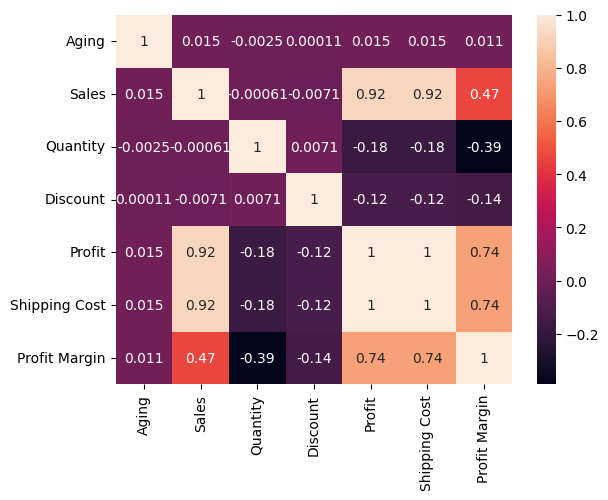

In [294]:
#Correlation between columns of data
# Select only numeric columns for correlation calculation
numeric_df = df1.select_dtypes(include=np.number)
corrheatmap = numeric_df.corr()
sns.heatmap(corrheatmap, annot=True)
plt.show()

# Random Forest Reggressor

In [295]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [296]:
# Define features (X) and target (y)
X = df1[["Quantity", "Profit", "Discount", "Shipping Cost"]]
y = df1["Sales"]

In [297]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [298]:
# Initialize the model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [299]:
# Train the model
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [300]:
# Predictions
y_pred = regressor.predict(X_test)

In [301]:
# Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 0.12689733378231055
Mean Squared Error: 2.482309285509171
R2 Score: 0.9994303461856762


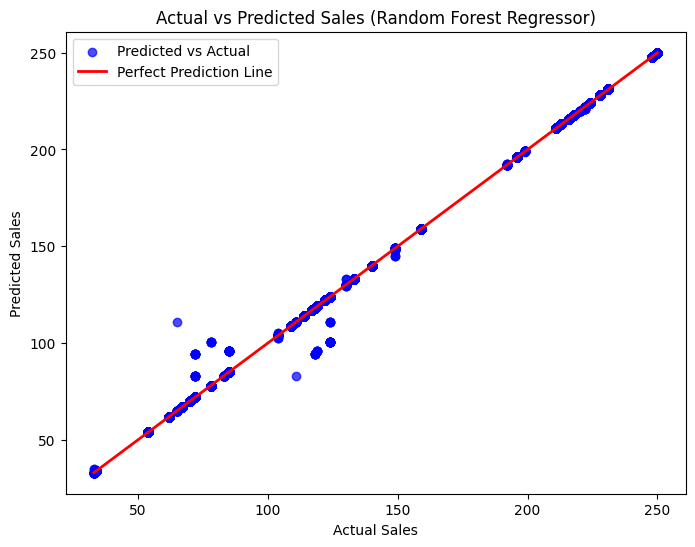

In [302]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted sales for Random Forest Regressor
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label="Predicted vs Actual", color="blue")
plt.title("Actual vs Predicted Sales (Random Forest Regressor)")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2, label="Perfect Prediction Line")  # Perfect prediction line
plt.legend()
plt.show()


# Decision Tree Classifier

In [303]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Features and target
X = df1[["Quantity", "Profit", "Discount", "Shipping Cost", "Aging"]]  # Features
y = df1["Product Category"]  # Target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Train Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

In [304]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                    precision    recall  f1-score   support

Auto & Accessories       0.93      0.94      0.94      1874
        Electronic       0.98      0.99      0.98       675
           Fashion       0.97      1.00      0.98      7694
  Home & Furniture       0.95      0.85      0.90      2577

          accuracy                           0.96     12820
         macro avg       0.96      0.94      0.95     12820
      weighted avg       0.96      0.96      0.96     12820



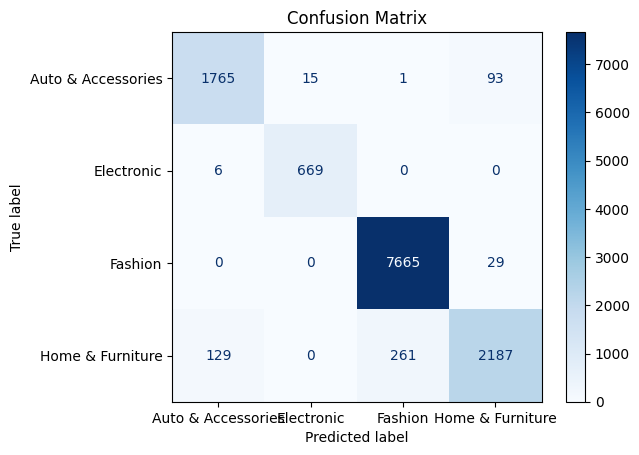

In [305]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [306]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/NewCodeTrial_04.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/NewCodeTrial_04.ipynb to html
[NbConvertApp] Writing 376172 bytes to /content/drive/MyDrive/Colab Notebooks/NewCodeTrial_04.html
